In [144]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [145]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [146]:
import pandas as pd

In [148]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/twitter1.csv', encoding='latin-1', header=0)
rng = RandomState()
#df.drop(['Cleanedreview'],axis=1,inplace=True)
#df.to_csv('mr/sst5.csv', index=False)
train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-1twitter.csv', index=False)
test.to_csv('mr/test-1twitter.csv', index=False)

In [149]:
train_df = pd.read_csv("mr/train-1twitter.csv", encoding='latin-1', header=0)

In [150]:
train_df

,review,sentiment
0,Fucking wild idea here but what if the vocal l...,1
1,Friday mood AvengersEndgame Thor,2
2,idinamenzel I guess I discovered a new vocal e...,1
3,BenMendelsohn_ I actually thought there was an...,1
4,Critique en ligne sur YouTube (lien sur mon pr...,2
...,...,...
26996,this shouldve been the opening to DarkPhoenix...,0
26997,Witness this action-packed special-effects spe...,0
26998,ItÂs officially the most listened to episode ...,2
26999,Hear me and rejoice! ebonymaw avengers avenger...,2


In [151]:
train_df.iloc[0][1]

1

In [152]:
test_df = pd.read_csv("mr/test-1twitter.csv", encoding='latin-1', header=0)

In [153]:
test_df.shape

(3000, 2)

In [154]:
test_df.head()

,review,sentiment
0,Oh and common fight scenes were the best part ...,2
1,After seeing Cats the musical I legitimately t...,0
2,ONCE UPON A TIME IN HOLLYWOOD will be HELD OVE...,2
3,My TeenChoice for ChoiceSciFiFantasyMovie is D...,0
4,Internship and Project Drive was conducted at ...,1


In [155]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,review,sentiment
0,Fucking wild idea here but what if the vocal l...,1
1,Friday mood AvengersEndgame Thor,2
2,idinamenzel I guess I discovered a new vocal e...,1
3,BenMendelsohn_ I actually thought there was an...,1
4,Critique en ligne sur YouTube (lien sur mon pr...,2
5,.CaitlinPacific's review of OnceUponATimeInHol...,2
6,My review for The Wicker Man! Sorry John Wick ...,2
7,ThereÂs always one loud person in the theater...,0
8,05/08/2019 SB Nation AM Hour 3 via Audioboom ...,1
9,Ta-Da! It's ColliderVideo Movie Talk. One of t...,2


In [156]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,Fucking wild idea here but what if the vocal l...
1,1,2,Friday mood AvengersEndgame Thor
2,2,1,idinamenzel I guess I discovered a new vocal e...
3,3,1,BenMendelsohn_ I actually thought there was an...
4,4,2,Critique en ligne sur YouTube (lien sur mon pr...


In [157]:
train_df_bert = train_df_bert.iloc[0:10000]

In [158]:
train_df_bert

,id,label,sentence
0,0,1,Fucking wild idea here but what if the vocal l...
1,1,2,Friday mood AvengersEndgame Thor
2,2,1,idinamenzel I guess I discovered a new vocal e...
3,3,1,BenMendelsohn_ I actually thought there was an...
4,4,2,Critique en ligne sur YouTube (lien sur mon pr...
...,...,...,...
9995,9995,0,DarkPhoenix was originally going to be two mov...
9996,9996,0,The first 30-45 minutes was absolutely shockin...
9997,9997,1,Shmee_is_me Checks Out Capter 2 Of John Wick! ...
9998,9998,2,OnceUponATimeInHollywood is a near perfect movie.


In [159]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,2,Oh and common fight scenes were the best part ...
1,1,0,After seeing Cats the musical I legitimately t...
2,2,2,ONCE UPON A TIME IN HOLLYWOOD will be HELD OVE...
3,3,0,My TeenChoice for ChoiceSciFiFantasyMovie is D...
4,4,1,Internship and Project Drive was conducted at ...


In [160]:
test_df_bert = test_df_bert.iloc[0:3000]

In [161]:
test_df_bert

,id,label,sentence
0,0,2,Oh and common fight scenes were the best part ...
1,1,0,After seeing Cats the musical I legitimately t...
2,2,2,ONCE UPON A TIME IN HOLLYWOOD will be HELD OVE...
3,3,0,My TeenChoice for ChoiceSciFiFantasyMovie is D...
4,4,1,Internship and Project Drive was conducted at ...
...,...,...,...
2995,2995,0,Taylor sweetie. I'm sorry they lied to you. It...
2996,2996,0,As I sit with my actual cat purring in my lap ...
2997,2997,2,captainmarvel work In progress. marvel marvelf...
2998,2998,1,ok but 'true colors' is a reddie song now. i n...


In [162]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [163]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [164]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [165]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  Friday mood AvengersEndgame Thor
Tokenized:  ['friday', 'mood', 'avengers', '##end', '##game', 'thor']
Token IDs:  [5958, 6888, 14936, 10497, 16650, 15321]


In [166]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  136


In [167]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  130


In [168]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  Fucking wild idea here but what if the vocal line did a cover of Into The Unknown Frozen2 BTSWorldWidePerformers
Token IDs: tensor([  101,  8239,  3748,  2801,  2182,  2021,  2054,  2065,  1996,  5554,
         2240,  2106,  1037,  3104,  1997,  2046,  1996,  4242,  7708,  2475,
        18411, 26760,  2953,  6392, 22517,  4842, 14192,  2545,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [169]:

train_df_bert.head()

,id,label,sentence
0,0,1,Fucking wild idea here but what if the vocal l...
1,1,2,Friday mood AvengersEndgame Thor
2,2,1,idinamenzel I guess I discovered a new vocal e...
3,3,1,BenMendelsohn_ I actually thought there was an...
4,4,2,Critique en ligne sur YouTube (lien sur mon pr...


In [170]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [171]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [172]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (3000, 60)


In [173]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [174]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [185]:

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
dropout_49 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
dropout_50 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
dropout_51 (Dropout)         (None, 60,

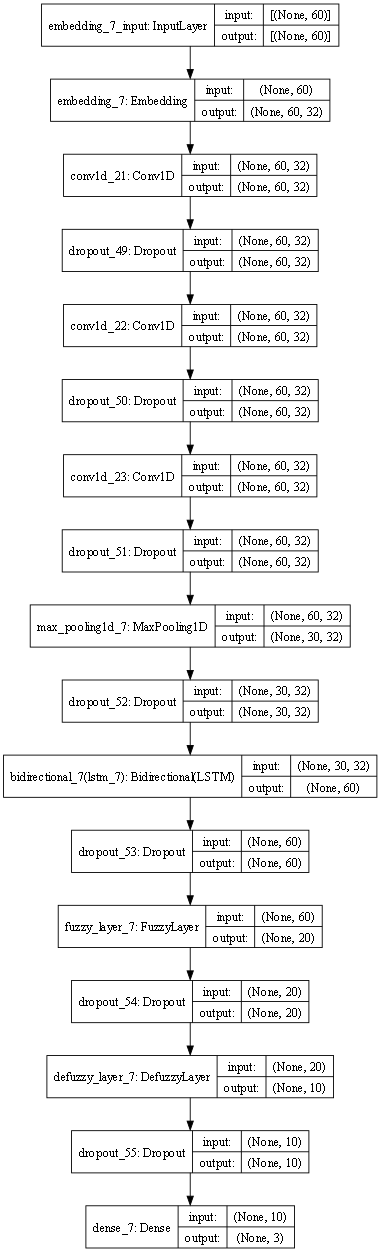

In [186]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [187]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)

print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)

print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 16s 13ms/step - loss: 0.7967 - accuracy: 0.5381 - val_loss: 0.5811 - val_accuracy: 0.6190
Epoch 2/20
900/900 [==============================] - 11s 13ms/step - loss: 0.5454 - accuracy: 0.6544 - val_loss: 0.5636 - val_accuracy: 0.6330
Epoch 3/20
900/900 [==============================] - 11s 13ms/step - loss: 0.5147 - accuracy: 0.6724 - val_loss: 0.5880 - val_accuracy: 0.6690
Epoch 4/20
900/900 [==============================] - 11s 13ms/step - loss: 0.4604 - accuracy: 0.7629 - val_loss: 0.4397 - val_accuracy: 0.7990
Epoch 5/20
900/900 [==============================] - 11s 12ms/step - loss: 0.3443 - accuracy: 0.8464 - val_loss: 0.3687 - val_accuracy: 0.8430
Epoch 6/20
900/900 [==============================] - 11s 12ms/step - loss: 0.2637 - accuracy: 0.8919 - val_loss: 0.3660 - val_accuracy: 0.8420
Epoch 7/20
900/900 [==============================] - 11s 12ms/step - loss: 0.2039 - accuracy: 0.9228 - val_loss: 0.4493 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()